In [1]:


import numpy as np # linear algebra
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('Air quality data 2021.csv')
df.head()

,time,PM2.5
0,6/1/2021 0:00,28.5
1,6/1/2021 1:00,13.9
2,6/1/2021 2:00,10.3
3,6/1/2021 3:00,9.5
4,6/1/2021 4:00,7.8


As we are only taking 2021 data for predicting AQI 


In [6]:

df=df[df['time'] >= ('2021-01-06')]
print(df.shape)
df.head()

(2200, 2)


,time,PM2.5
0,6/1/2021 0:00,28.5
1,6/1/2021 1:00,13.9
2,6/1/2021 2:00,10.3
3,6/1/2021 3:00,9.5
4,6/1/2021 4:00,7.8


AS INDEX IS MIXED WE NEED TO FIX THE INDEX 

In [7]:
df.reset_index(drop=True,inplace=True)
df.head()

,time,PM2.5
0,6/1/2021 0:00,28.5
1,6/1/2021 1:00,13.9
2,6/1/2021 2:00,10.3
3,6/1/2021 3:00,9.5
4,6/1/2021 4:00,7.8


**TO CHECK THE NULL VALUES IN OUR 2020 DATATSET**

In [8]:
df.isnull().sum()

time     0
PM2.5    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2200 non-null   object 
 1   PM2.5   2200 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.5+ KB


In [10]:
for i in df.columns:
    print('column name:{}    unique values:{}'.format(i,len(df[i].unique())))

column name:time    unique values:2200
column name:PM2.5    unique values:352


**DEALING WITH MISSING VALUES**

In [14]:
print(df.columns)
df['Correct_PM10_Column_Name'] = df['Correct_PM10_Column_Name'].fillna(df['Correct_PM10_Column_Name'].mean())


Index(['time', 'PM2.5'], dtype='object')


KeyError: 'Correct_PM10_Column_Name'

**WE ARE FILLING MISSING VALUES IN 2 DIFFERENT CATEGORIES**


**FOR NUMERIC VALUES : MEAN()**


**FOR CATEGORICAL VALUES : MODE()**

In [15]:
df.head()

,time,PM2.5
0,6/1/2021 0:00,28.5
1,6/1/2021 1:00,13.9
2,6/1/2021 2:00,10.3
3,6/1/2021 3:00,9.5
4,6/1/2021 4:00,7.8


In [16]:
# how much is the average amount of pollution in each city stations
most_polluted = df[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

KeyError: "None of [Index(['City', 'AQI', 'PM10', 'CO'], dtype='object')] are in the [columns]"

In [0]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
f, ax_ = plt.subplots(1, 3, figsize = (15,15))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AirQualityIndex', 'ParticulateMatter10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')   
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 14);
    ax_[i].set_title(titles[i])
    f.tight_layout()

**AS THERE ARE MANY POLUTANTS IN THE AIR WE ARE CLASSIFYING THEM INTO 2 CATEGORIES**

**VEHICLE_POLUTANTS : PM2.5 , PM10 , NO , NOx , NH3 , CO**

**INDUSTRY_POLUTANT : SO2 , O3 , BENZENE , TOLUENE , XYLENE**

In [0]:
df1=df.copy()
df1['Vehicle_Pollution_content']=df1['PM2.5']+df1['PM10']+df1['NO']+df1['NOx']+df1['NH3']+df1['CO']
df1['Industry_pollutants']=df1['SO2']+df1['O3']+df1['Benzene']+df1['Toluene']+df1['Xylene']
df1.drop(['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene'],axis=1,inplace=True)
df1.head()

**DISTRIBUTING DATE INTO DAY AND MONTH COLUMNS**

In [0]:
df1['Day_date']=pd.to_datetime(df1['Date'],format='%Y/%m/%d').dt.day
df1['month_date']=pd.to_datetime(df1['Date'],format='%Y/%m/%d').dt.month
df1.drop(['Date'],axis=1,inplace=True)
df1.head()

In [0]:
df1.describe()

**IDENTIFYING OUTLIERS**

In [16]:
outliers=df1.loc[df1['Vehicle_Pollution_content'] > (1000)]
outliers

,City,AQI,AQI_Bucket,Vehicle_Pollution_content,Industry_pollutants,Day_date,month_date
1159,Brajrajnagar,74.0,Moderate,1031.71,63.740631,11,5
1162,Brajrajnagar,178.0,Moderate,1010.67,109.989878,14,5
1760,Delhi,492.0,Severe,1160.54,128.740000,1,1
1761,Delhi,485.0,Severe,1092.40,141.570000,2,1
2302,Guwahati,462.0,Severe,1154.02,46.260631,15,1


In [17]:
outliers=df1.loc[df1['Industry_pollutants']>(800)]
outliers

,City,AQI,AQI_Bucket,Vehicle_Pollution_content,Industry_pollutants,Day_date,month_date
3938,Shillong,68.0,Satisfactory,102.99,909.556883,25,1
3939,Shillong,74.0,Satisfactory,105.60,924.636883,26,1
3971,Shillong,60.0,Satisfactory,50.26,847.706883,27,2
3972,Shillong,42.0,Good,46.68,840.986883,28,2
3973,Shillong,51.0,Satisfactory,49.98,943.246883,29,2
3974,Shillong,53.0,Satisfactory,69.49,907.876883,1,3
3975,Shillong,60.0,Satisfactory,88.69,915.976883,2,3
3976,Shillong,63.0,Satisfactory,71.86,915.046883,3,3
3977,Shillong,64.0,Satisfactory,90.79,946.386883,4,3
3978,Shillong,63.0,Satisfactory,65.67,917.676883,5,3


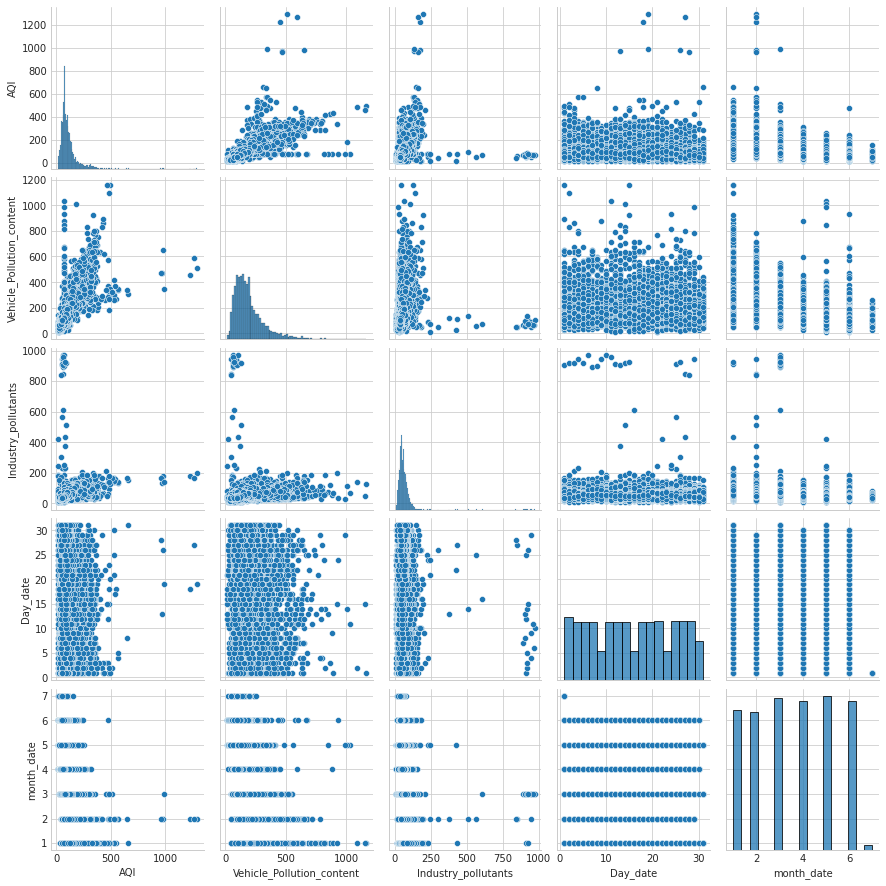

In [18]:
sns.pairplot(data=df1)

In [19]:
df1.drop(['AQI_Bucket'],axis=1,inplace=True)
df1.head()

,City,AQI,Vehicle_Pollution_content,Industry_pollutants,Day_date,month_date
0,Ahmedabad,216.0,246.702005,89.52,1,1
1,Ahmedabad,162.0,237.402005,85.00,2,1
2,Ahmedabad,220.0,244.262005,97.88,3,1
3,Ahmedabad,254.0,258.412005,100.41,4,1
4,Ahmedabad,255.0,207.712005,106.40,5,1


**IN ORDER TO SEE EVERY COLUMN IN THE DATASET**

In [20]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

**CREATING DUMMIES FOR CITY COLUMN**

In [21]:
df1=pd.get_dummies(df1,drop_first=True)
print(df1.shape)
df1.head()

(4646, 30)


,AQI,Vehicle_Pollution_content,Industry_pollutants,Day_date,month_date,City_Aizawl,City_Amaravati,City_Amritsar,City_Bengaluru,City_Bhopal,City_Brajrajnagar,City_Chandigarh,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Gurugram,City_Guwahati,City_Hyderabad,City_Jaipur,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
0,216.0,246.702005,89.52,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,162.0,237.402005,85.00,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,220.0,244.262005,97.88,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,254.0,258.412005,100.41,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,255.0,207.712005,106.40,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**AS AQI IS DEPENDENT VARIABLE WE DROPING IT FROM DATASET AND PUTING IT IN Y**

In [22]:
X=df1.drop(['AQI'],axis=1)
y=df1['AQI']
print(X.shape)
print(y.shape)

(4646, 29)
(4646,)


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

**RANDOM FOREST REGRESSOR**

In [24]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.7522958932429165

**GRADIENT BOSSTING REGRESSOR**

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
model3=GradientBoostingRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.7784523269881535

**EXTRA TREE REGRESSOR**

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
model3=ExtraTreesRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.8339350883607192

**HYPERTUNING OF EXTRA TREE REGRESSOR**

In [27]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import mean_squared_error,make_scorer

clf = ExtraTreesRegressor(random_state=12)
param_dist = {"n_estimators": [5, 10],
              "max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False]}
# rmse = make_scorer(mean_squared_error, greater_is_better=False)
r = RandomizedSearchCV(clf, param_distributions=param_dist,
                       cv=10,
                       scoring='r2',
                       n_iter=3,
                       n_jobs=2)
r.fit(X, y)

RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(random_state=12),
                   n_iter=3, n_jobs=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f60024e4a90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f60024e4f10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f60024e4d50>,
                                        'n_estimators': [5, 10]},
                   scoring='r2')

In [28]:
print(r.best_params_)
r.score(X_test,y_test)

{'bootstrap': True, 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 9, 'min_samples_split': 6, 'n_estimators': 5}


0.4220806786923651

**HYPERTUNING OF RANDOM FOREST REGRESSOR**

In [29]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [30]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, verbose=2)

In [31]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [32]:
rf_random.score(X_test,y_test)

0.8344493258346044

In [33]:
prediction=rf_random.predict(X_test)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

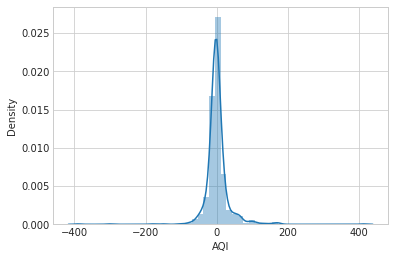

In [34]:
sns.distplot(y_test-prediction)